In [1]:
!pip install pip --upgrade
!pip install -q git+https://github.com/huggingface/transformers.git datasets sentencepiece

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 103.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3


In [25]:
!pip install tensorboard



Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install -q datasets seqeval

In [3]:
from datasets import load_dataset 

# this dataset uses the new Image feature :)
dataset = load_dataset("jinhybr/WildReceipt")

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/ubuntu/.local/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/ubuntu/.local/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset wild_receipt downloaded and prepared to /home/ubuntu/.cache/huggingface/datasets/jinhybr___wild_receipt/WildReceipt/1.0.0/d6bb137b7a99f72b8489749d6511bb4af603c0ab89d00ab36d3c8a55e74d3f40. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 1267
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 472
    })
})

In [5]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['Ignore', 'Store_name_value', 'Store_name_key', 'Store_addr_value', 'Store_addr_key', 'Tel_value', 'Tel_key', 'Date_value', 'Date_key', 'Time_value', 'Time_key', 'Prod_item_value', 'Prod_item_key', 'Prod_quantity_value', 'Prod_quantity_key', 'Prod_price_value', 'Prod_price_key', 'Subtotal_value', 'Subtotal_key', 'Tax_value', 'Tax_key', 'Tips_value', 'Tips_key', 'Total_value', 'Total_key', 'Others'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None)}

In [6]:
example = dataset["train"][0]
example["image_path"]

'/home/ubuntu/.cache/huggingface/datasets/downloads/extracted/8764cc5ba9d9199643817abd192f0bf266e0c0552e9b75a1f4ea6356a75e020c/wildreceipt/image_files/Image_16/11/d5de7f2a20751e50b84c747c17a24cd98bed3554.jpeg'

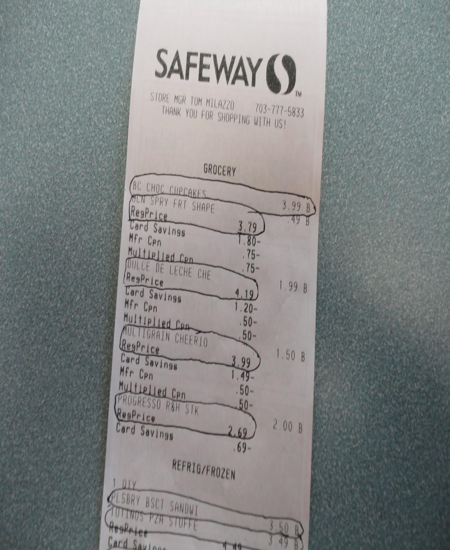

In [7]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(example["image_path"])
image = image.convert("RGB")
#image.resize((350,450))
image.resize((450,550))

In [8]:
words, bboxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(bboxes)
print(ner_tags)

['SAFEWAY', 'TM', 'ATOREMGRTOMMILAZZO', '703-777-5833', 'THANKYOUFORSHOPPINGWITHUS!', 'GROCERY', 'BCCHOCCUPCAKES', 'ACNSPRYFRTSHAPE', 'Regprice', 'Cardsavings', 'MfrCpn', 'MultipliedCpn', 'DULCEDELECHECHE', 'Regprice', 'CardSavings', 'MfrCpn', 'MuitipliedCpn', 'MULTIGRAINCHEERIO', 'RegPrice', 'CardSavings', 'MfrCpn', 'MuitieliedCpn', 'PROGRESSOR&HSTK', 'RegPrice', 'CardSavings', 'REFRIG/FROZEN', '3.99', '.49', '3.79', '1.80-', '.75-', '.75-', '1.99', '4.19', '1.20-', '.50-', '.50-', '1.50', '3.99', '1.49-', '.50-', '.50-', '2.00', '2.69', '.69-', '1OIY', 'PLSBRYBSCTSANDWI', 'TOTINOSPZASTOFFE', 'RegPrice', '', '', '3.50', '3.49', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
[[343, 86, 585, 158], [655, 163, 671, 175], [334, 166, 520, 199], [566, 185, 675, 213], [360, 191, 635, 235], [452, 295, 525, 322], [296, 328, 458, 360], [293, 350, 477, 388], [291, 373, 371, 402], [289, 398, 411, 430], [286, 422, 358, 448], [284, 446, 428, 481], [283, 470, 468, 509], [280, 494, 363, 520], [278, 519, 402, 551]

In [9]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

Downloading:   0%|          | 0.00/275 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/856 [00:00<?, ?B/s]

The size parameter should be a dictionary with keys ('height', 'width'), ('shortest_edge', 'longest_edge') or ('shortest_edge',) got 224. Setting as {'height': 224, 'width': 224}.


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [10]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [11]:
print(label_list)

['Ignore', 'Store_name_value', 'Store_name_key', 'Store_addr_value', 'Store_addr_key', 'Tel_value', 'Tel_key', 'Date_value', 'Date_key', 'Time_value', 'Time_key', 'Prod_item_value', 'Prod_item_key', 'Prod_quantity_value', 'Prod_quantity_key', 'Prod_price_value', 'Prod_price_key', 'Subtotal_value', 'Subtotal_key', 'Tax_value', 'Tax_key', 'Tips_value', 'Tips_key', 'Total_value', 'Total_key', 'Others']


In [12]:
print(id2label)

{0: 'Ignore', 1: 'Store_name_value', 2: 'Store_name_key', 3: 'Store_addr_value', 4: 'Store_addr_key', 5: 'Tel_value', 6: 'Tel_key', 7: 'Date_value', 8: 'Date_key', 9: 'Time_value', 10: 'Time_key', 11: 'Prod_item_value', 12: 'Prod_item_key', 13: 'Prod_quantity_value', 14: 'Prod_quantity_key', 15: 'Prod_price_value', 16: 'Prod_price_key', 17: 'Subtotal_value', 18: 'Subtotal_key', 19: 'Tax_value', 20: 'Tax_key', 21: 'Tips_value', 22: 'Tips_key', 23: 'Total_value', 24: 'Total_key', 25: 'Others'}


In [13]:
'''def prepare_examples(examples):
  images = examples[image_column_name]
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding'''


def prepare_examples(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']] #Image.open(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [14]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [15]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> SAFEWAY TM ATOREMGRTOMMILAZZO 703-777-5833 THANKYOUFORSHOPPINGWITHUS! GROCERY BCCHOCCUPCAKES ACNSPRYFRTSHAPE Regprice Cardsavings MfrCpn MultipliedCpn DULCEDELECHECHE Regprice CardSavings MfrCpn MuitipliedCpn MULTIGRAINCHEERIO RegPrice CardSavings MfrCpn MuitieliedCpn PROGRESSOR&HSTK RegPrice CardSavings REFRIG/FROZEN 3.99.49 3.79 1.80-.75-.75- 1.99 4.19 1.20-.50-.50- 1.50 3.99 1.49-.50-.50- 2.00 2.69.69- 1OIY PLSBRYBSCTSANDWI TOTINOSPZASTOFFE RegPrice 3.50 3.49 B B B B B B B</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [16]:
train_dataset.set_format("torch")

In [17]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [18]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 472
})

In [19]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> CHOEUN KOREANRESTAURANT 2621ORANGETHORPEAVE,FULLERTON. (714)879-3574 THANKYOU!! DATE 12/30/2016FRI 19:19 BIBIM.OCTOPUT1 S-FOODP.CAKT1 PORKDUMPLINT1 LABEEFRIBT1 $13.99 $14.99 $8.99 ￥17.99 4.00xITEMS SUBTOTAL TAX1 TOTAL $55.96 $4.48 $60.44 TIME</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

In [20]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 SAF 1
EW -100
AY -100
 TM 25
 AT 25
OR -100
EM -100
GR -100
T -100
OM -100
M -100
IL -100
AZ -100
Z -100
O -100
 7 5
03 -100
- -100
777 -100
- -100
58 -100
33 -100
 THANK 25
YOU -100
FOR -100
SH -100
OP -100
P -100
ING -100
W -100
ITH -100
US -100
! -100
 GR 25
OC -100
ERY -100
 BC 11
CHO -100
CC -100
U -100
PC -100
AK -100
ES -100
 AC 11
N -100
SP -100
RY -100
FR -100
TS -100
H -100
APE -100
 Reg 25
price -100
 Cards 25
av -100
ings -100
 M 25
fr -100
C -100
pn -100
 Multi 25
pl -100
ied -100
C -100
pn -100
 DU 11
LC -100
ED -100
E -100
LE -100
CH -100
EC -100
HE -100
 Reg 25
price -100
 Card 25
Sav -100
ings -100
 M 25
fr -100
C -100
pn -100
 M 25
uit -100
ipl -100
ied -100
C -100
pn -100
 M 11
ULT -100
IG -100
RA -100
IN -100
CH -100
E -100
ER -100
IO -100
 Reg 25
Price -100
 Card 25
Sav -100
ings -100
 M 25
fr -100
C -100
pn -100
 M 25
uit -100
iel -100
ied -100
C -100
pn -100
 PROG 11
R -100
ESS -100
OR -100
& -100
H -100
ST -100
K -100
 Reg 25
Price -100
 Card 25
Sav -1

In [21]:
from datasets import load_metric

metric = load_metric("seqeval")

<ipython-input-21-edef154daec7>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [22]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [23]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
from huggingface_hub import HfFolder

repo_id = 'OCR-LayoutLMv3-Invoice'

In [29]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir=repo_id,
                                  max_steps=6000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  logging_dir=f"{repo_id}/logs",
                                  logging_strategy="steps",
                                  report_to="tensorboard",
                                  push_to_hub = True,
                                  hub_strategy="every_save",
                                  hub_model_id= repo_id,
                                  hub_token=HfFolder.get_token(),
                                 )

PyTorch: setting up devices


In [31]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

/home/ubuntu/.local/lib/python3.8/site-packages/huggingface_hub/repository.py:705: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.11.
  warnings.warn(
Cloning https://huggingface.co/jinhybr/OCR-LayoutLMv3-Invoice into local empty directory.
max_steps is given, it will override any value given in num_train_epochs


In [32]:
trainer.train()

/home/ubuntu/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1267
  Num Epochs = 10
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 6000
  Number of trainable parameters = 125937562
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/modeling_utils.py:763: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,1.503189,0.493415,0.144351,0.223358,0.606395
200,No log,1.028197,0.588386,0.441998,0.504793,0.738456
300,No log,0.785586,0.744797,0.620476,0.676976,0.813261
400,No log,0.646396,0.773552,0.668914,0.717438,0.839914
500,1.173300,0.567180,0.760860,0.730288,0.745260,0.855709
600,1.173300,0.505501,0.765767,0.765240,0.765503,0.867665
700,1.173300,0.473473,0.794622,0.784781,0.789670,0.878359
800,1.173300,0.441422,0.796194,0.794551,0.795372,0.881759
900,1.173300,0.409439,0.817636,0.806385,0.811972,0.889437
1000,0.504700,0.397066,0.821884,0.824825,0.823352,0.896073


***** Running Evaluation *****
  Num examples = 472
  Batch size = 2
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_name_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_addr_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Tel_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Date_key seems not to be NE t

TrainOutput(global_step=6000, training_loss=0.30211416180928546, metrics={'train_runtime': 2035.9777, 'train_samples_per_second': 5.894, 'train_steps_per_second': 2.947, 'total_flos': 3183185141434368.0, 'train_loss': 0.30211416180928546, 'epoch': 9.46})

In [33]:
# change apply_ocr to True to use the ocr text for inference
#processor.feature_extractor.apply_ocr = True

# Save processor and create model card
processor.save_pretrained(repo_id)
trainer.create_model_card()
trainer.push_to_hub()

Feature extractor saved in OCR-LayoutLMv3-Invoice/preprocessor_config.json
tokenizer config file saved in OCR-LayoutLMv3-Invoice/tokenizer_config.json
Special tokens file saved in OCR-LayoutLMv3-Invoice/special_tokens_map.json
Saving model checkpoint to OCR-LayoutLMv3-Invoice
Configuration saved in OCR-LayoutLMv3-Invoice/config.json
Model weights saved in OCR-LayoutLMv3-Invoice/pytorch_model.bin
Feature extractor saved in OCR-LayoutLMv3-Invoice/preprocessor_config.json
tokenizer config file saved in OCR-LayoutLMv3-Invoice/tokenizer_config.json
Special tokens file saved in OCR-LayoutLMv3-Invoice/special_tokens_map.json


Upload file logs/events.out.tfevents.1667783647.132-145-141-187.64914.0:  91%|#########1| 32.0k/35.0k [00:00<?…

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/jinhybr/OCR-LayoutLMv3-Invoice
   8c5f4a5..2f2477a  main -> main



'https://huggingface.co/jinhybr/OCR-LayoutLMv3-Invoice/commit/2f2477a6bd69f6353c1e264eb7c40dac5bf7da96'

In [34]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 472
  Batch size = 2
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/modeling_utils.py:763: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_name_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_addr_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Tel_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ubuntu/.local/lib/python3.8/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Date_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home

{'eval_loss': 0.30247119069099426,
 'eval_precision': 0.885973482205164,
 'eval_recall': 0.8735379111049952,
 'eval_f1': 0.8797117516629711,
 'eval_accuracy': 0.9252495338378852,
 'eval_runtime': 15.5996,
 'eval_samples_per_second': 30.257,
 'eval_steps_per_second': 15.129,
 'epoch': 9.46}

### Inference

In [35]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("jinhybr/OCR-LayoutLMv3-Invoice")

Downloading:   0%|          | 0.00/2.33k [00:00<?, ?B/s]

loading configuration file config.json from cache at /home/ubuntu/.cache/huggingface/hub/models--jinhybr--OCR-LayoutLMv3-Invoice/snapshots/2f2477a6bd69f6353c1e264eb7c40dac5bf7da96/config.json
Model config LayoutLMv3Config {
  "_name_or_path": "jinhybr/OCR-LayoutLMv3-Invoice",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Ignore",
    "1": "Store_name_value",
    "2": "Store_name_key",
    "3": "Store_addr_value",
    "4": "Store_addr_key",
    "5": "Tel_value",
    "6": "Tel_key",
    "7": "Date_value",
    "8": "Date_key",
    "9": "Time_value",
    "10": "Time_key",
    "11": "Prod_item_value",
    "12": "Prod_item_key",
    "13": "Prod_quantity_value",
 

Downloading:   0%|          | 0.00/504M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /home/ubuntu/.cache/huggingface/hub/models--jinhybr--OCR-LayoutLMv3-Invoice/snapshots/2f2477a6bd69f6353c1e264eb7c40dac5bf7da96/pytorch_model.bin
All model checkpoint weights were used when initializing LayoutLMv3ForTokenClassification.

All the weights of LayoutLMv3ForTokenClassification were initialized from the model checkpoint at jinhybr/OCR-LayoutLMv3-Invoice.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LayoutLMv3ForTokenClassification for predictions without further training.


In [45]:
example = dataset["test"][10]
print(example.keys())

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])


In [52]:
example = dataset["test"][10]
print(example.keys())

image = Image.open(example["image_path"])
words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
input_ids torch.Size([1, 137])
attention_mask torch.Size([1, 137])
bbox torch.Size([1, 137, 4])
labels torch.Size([1, 137])
pixel_values torch.Size([1, 3, 224, 224])


In [53]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

torch.Size([1, 137, 26])
[7, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 6, 6, 5, 5, 5, 5, 5, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 7, 7, 7, 7, 13, 11, 11, 11, 11, 11, 13, 11, 11, 13, 11, 11, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 18, 25, 25, 18, 25, 25, 20, 25, 25, 25, 25, 24, 17, 17, 17, 17, 17, 25, 25, 25, 25, 19, 19, 19, 23, 23, 23, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 9, 9, 9, 7]


In [54]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 1, -100, -100, 1, -100, 3, -100, -100, -100, -100, 6, -100, 5, -100, -100, -100, -100, 25, -100, -100, -100, -100, -100, -100, 25, -100, -100, -100, -100, 25, -100, -100, -100, -100, 25, -100, -100, -100, 25, -100, -100, 25, -100, -100, -100, -100, -100, -100, 7, -100, -100, -100, 13, 11, -100, -100, -100, -100, 13, 11, -100, 13, 11, -100, -100, 15, -100, -100, 15, -100, -100, 15, -100, -100, 24, -100, -100, -100, -100, -100, 25, -100, -100, 18, -100, 20, -100, -100, -100, -100, -100, 24, 23, -100, -100, 25, -100, -100, 17, -100, -100, 19, -100, -100, 23, -100, -100, 3, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 25, -100, -100, -100, -100, -100, -100, -100, -100, 25, -100, -100, -100, -100, 9, -100, -100, -100]


In [55]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

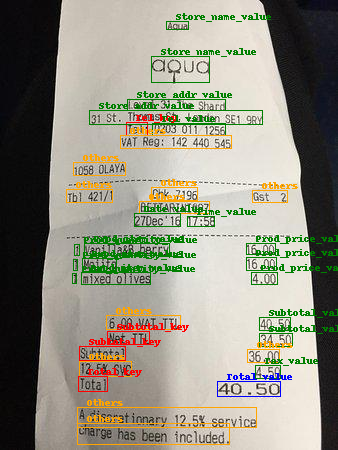

In [56]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {
    "Date_key": 'red',
    "Date_value": 'green',
    "Ignore": 'orange',
    "Others": 'orange',
    "Prod_item_key": 'red',
    "Prod_item_value": 'green',
    "Prod_price_key": 'red',
    "Prod_price_value": 'green',
    "Prod_quantity_key": 'red',
    "Prod_quantity_value": 'green',
    "Store_addr_key": 'red',
    "Store_addr_value": 'green',
    "Store_name_key": 'red',
    "Store_name_value": 'green',
    "Subtotal_key": 'red',
    "Subtotal_value": 'green',
    "Tax_key": 'red',
    "Tax_value": 'green',
    "Tel_key": 'red',
    "Tel_value": 'green',
    "Time_key": 'red',
    "Time_value": 'green',
    "Tips_key": 'red',
    "Tips_value": 'green',
    "Total_key": 'red',
    "Total_value": 'blue'
  }

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

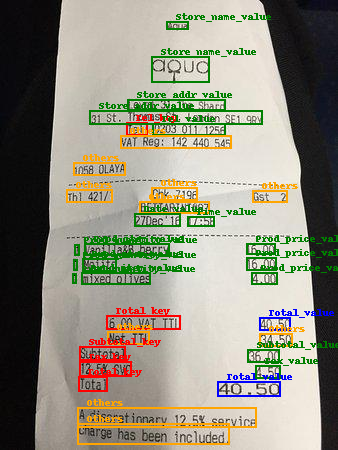

In [57]:
image = Image.open(example["image_path"]).convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image